<a href="https://colab.research.google.com/github/darshanvjani/Kickstarter-Campaigns-Analysis/blob/main/Fine_Tuning_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
README




In this notebook we have again reduced the feature set from 47 to only 25 by training a decision tree.
we are taking those 25 features and then training base model(Random Forest, SVC, Logistic Regression, XGBoost, Bagging(Decision Trees), Decision Tree) as well as fine tuning it using gridsearch CV and also validating the model results by
using crossvalidation.
Finally we are suign advance techniques like voterclassifier and SMOTE to again increase the overall classification performance.
'''

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder


!pip install xgboost==1.3.3
!pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import os
import re
import string

from sklearn.preprocessing        import LabelEncoder, StandardScaler
from sklearn.model_selection      import train_test_split, StratifiedKFold, KFold
from sklearn.linear_model         import LogisticRegression
from sklearn.svm                  import SVC
from sklearn.tree                 import DecisionTreeClassifier
from sklearn.ensemble             import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from lightgbm                     import LGBMClassifier
# from xgboost                      import XGBClassifier
# from catboost                     import CatBoostClassifier
from sklearn.metrics              import accuracy_score,f1_score


In [ ]:
from sklearn.ensemble import StackingClassifier,VotingClassifier

In [ ]:
null_rm_cleaned_ds = pd.read_csv('/content/drive/MyDrive/257/ML Project/rm_column_encoded_2.csv')
null_rm_cleaned_ds.drop(['Unnamed: 0','SuccessfulBool','spotlight_b'],axis=1,inplace=True)
null_rm_cleaned_ds.head()

,goal,pledged,state,country,currency,currency_symbol,backers_count,static_usd_rate,usd_pledged,creator,...,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,currency_trailing_code_b,disable_communication_b,staff_pick_b
0,1500.0,0.0,1,20,12,0,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",...,17,36,36,1,1,0,0,1,0,0
1,500.0,0.0,1,20,12,0,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",...,10,60,60,1,1,0,0,1,0,0
2,100000.0,120.0,1,20,12,0,5,1.000000,120.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",...,1,60,60,1,1,0,0,1,0,0
3,5000.0,0.0,1,20,12,0,0,1.000000,0.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",...,0,30,30,1,1,0,0,1,0,0
4,3222.0,356.0,1,5,4,4,17,1.114613,396.802395,"{""urls"":{""web"":{""user"":""https://www.kickstarte...",...,0,32,32,0,0,0,0,0,0,0


In [ ]:
pd.set_option('max_colwidth', 20)

In [ ]:
def extract_name(element):
    # Convert the string to a dictionary
    element_dict = eval(element)
    # Extract the name and return it
    return element_dict["name"]

# Apply the function to the "element" column and put the result in a new "name" column
null_rm_cleaned_ds["founder_name"] = null_rm_cleaned_ds["creator"].apply(extract_name)

# Print the dataframe
null_rm_cleaned_ds.head()

,goal,pledged,state,country,currency,currency_symbol,backers_count,static_usd_rate,usd_pledged,creator,...,launch_to_deadline_days,launch_to_state_change_days,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,currency_trailing_code_b,disable_communication_b,staff_pick_b,founder_name
0,1500.0,0.0,1,20,12,0,0,1.000000,0.000000,"{""urls"":{""web"":{...",...,36,36,1,1,0,0,1,0,0,Diana L. Smith
1,500.0,0.0,1,20,12,0,0,1.000000,0.000000,"{""urls"":{""web"":{...",...,60,60,1,1,0,0,1,0,0,Amy Planalp
2,100000.0,120.0,1,20,12,0,5,1.000000,120.000000,"{""urls"":{""web"":{...",...,60,60,1,1,0,0,1,0,0,Emmanuel Adeyefa...
3,5000.0,0.0,1,20,12,0,0,1.000000,0.000000,"{""urls"":{""web"":{...",...,30,30,1,1,0,0,1,0,0,Michael Felder
4,3222.0,356.0,1,5,4,4,17,1.114613,396.802395,"{""urls"":{""web"":{...",...,32,32,0,0,0,0,0,0,0,Werner Hülsmann


In [ ]:
null_rm_cleaned_ds['founder_name'].value_counts()

Doug Gilliland             22
Patrick Thomas Mitchell    19
Michael                    18
Isaac Porras               17
MASIH VAHIDA               15
                           ..
Nathan Kennedy              1
Christopher Allgood         1
Finley                      1
Bret Davis                  1
Fiona O Doherty             1
Name: founder_name, Length: 18504, dtype: int64

In [ ]:
null_rm_cleaned_ds.drop(['creator'],axis=1,inplace=True)

In [ ]:
null_rm_cleaned_ds.shape

(20627, 45)

In [ ]:
null_rm_cleaned_ds['founder_name'] = LabelEncoder().fit_transform(null_rm_cleaned_ds['founder_name'])

In [ ]:
X = null_rm_cleaned_ds.drop(['state'],axis=1)
y = null_rm_cleaned_ds['state']

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X,y)

DecisionTreeClassifier(random_state=1)

In [ ]:
feat_imp = dict()
importance = dt.feature_importances_
# summarize feature importance
for i,v in zip(X.columns,importance):
 feat_imp[i] = v


def fun(dict_):
  return dict_[1]
sorted_arr = sorted(feat_imp.items(),reverse=True,key=fun)[:25]
print(sorted_arr)

[('backers_count', 0.2397334317958416), ('launch_to_state_change_days', 0.20044771313034557), ('goal', 0.16572311535223253), ('pledged', 0.12457845779293684), ('launch_to_deadline_days', 0.10515809265090391), ('usd_pledged', 0.047651712014833106), ('launched_at_yr', 0.03943358909478405), ('disable_communication_b', 0.03166739439193931), ('blurb_len', 0.002603060171462587), ('deadline_month', 0.002561002807561282), ('blurb_len_clean', 0.0024761851015287417), ('launched_at_month', 0.0021851926242667376), ('state_changed_at_day', 0.00215635093880092), ('launched_at_day', 0.0021523281002555363), ('static_usd_rate', 0.0020761558639817933), ('created_at_day', 0.00200866041703674), ('created_at_hr', 0.001999746053419326), ('created_at_month', 0.0019850681158774842), ('create_to_launch_days', 0.001875291646856534), ('name_len', 0.0018362766438406888), ('state_changed_at_hr', 0.0018059628384713426), ('founder_name', 0.0018039709066515171), ('name_len_clean', 0.001617411409222453), ('state_chang

In [ ]:
sum_ = 0
for y,z in sorted_arr:
  sum_ = sum_ + z
print(sum_)

0.9884151516137759


In [ ]:
important_colums = []
for y,z in sorted_arr:
  important_colums.append(y)

print(important_colums)

['backers_count', 'launch_to_state_change_days', 'goal', 'pledged', 'launch_to_deadline_days', 'usd_pledged', 'launched_at_yr', 'disable_communication_b', 'blurb_len', 'deadline_month', 'blurb_len_clean', 'launched_at_month', 'state_changed_at_day', 'launched_at_day', 'static_usd_rate', 'created_at_day', 'created_at_hr', 'created_at_month', 'create_to_launch_days', 'name_len', 'state_changed_at_hr', 'founder_name', 'name_len_clean', 'state_changed_at_yr', 'deadline_yr']


In [ ]:
X_25 = X[important_colums]
y = null_rm_cleaned_ds['state']

In [ ]:
X_y_25 = pd.concat([X_25, y],axis=1)

In [ ]:
X_y_25.head()

,backers_count,launch_to_state_change_days,goal,pledged,launch_to_deadline_days,usd_pledged,launched_at_yr,disable_communication_b,blurb_len,deadline_month,...,created_at_hr,created_at_month,create_to_launch_days,name_len,state_changed_at_hr,founder_name,name_len_clean,state_changed_at_yr,deadline_yr,state
0,0,36,1500.0,0.0,36,0.000000,2014,0,21.0,1,...,22,11,17,11.0,10,4504,9.0,2015,2015,1
1,0,60,500.0,0.0,60,0.000000,2015,0,23.0,5,...,9,2,10,4.0,16,894,4.0,2015,2015,1
2,5,60,100000.0,120.0,60,120.000000,2015,0,18.0,3,...,0,1,1,8.0,8,5141,8.0,2015,2015,1
3,0,30,5000.0,0.0,30,0.000000,2014,0,21.0,10,...,22,9,0,7.0,0,11056,6.0,2014,2014,1
4,17,32,3222.0,356.0,32,396.802395,2016,0,18.0,6,...,14,5,0,7.0,12,17362,7.0,2016,2016,1


In [ ]:
X_y_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20627 entries, 0 to 20626
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   backers_count                20627 non-null  int64  
 1   launch_to_state_change_days  20627 non-null  int64  
 2   goal                         20627 non-null  float64
 3   pledged                      20627 non-null  float64
 4   launch_to_deadline_days      20627 non-null  int64  
 5   usd_pledged                  20627 non-null  float64
 6   launched_at_yr               20627 non-null  int64  
 7   disable_communication_b      20627 non-null  int64  
 8   blurb_len                    20627 non-null  float64
 9   deadline_month               20627 non-null  int64  
 10  blurb_len_clean              20627 non-null  float64
 11  launched_at_month            20627 non-null  int64  
 12  state_changed_at_day         20627 non-null  int64  
 13  launched_at_day 

In [ ]:
# X_y_25.to_csv("XY25.csv")

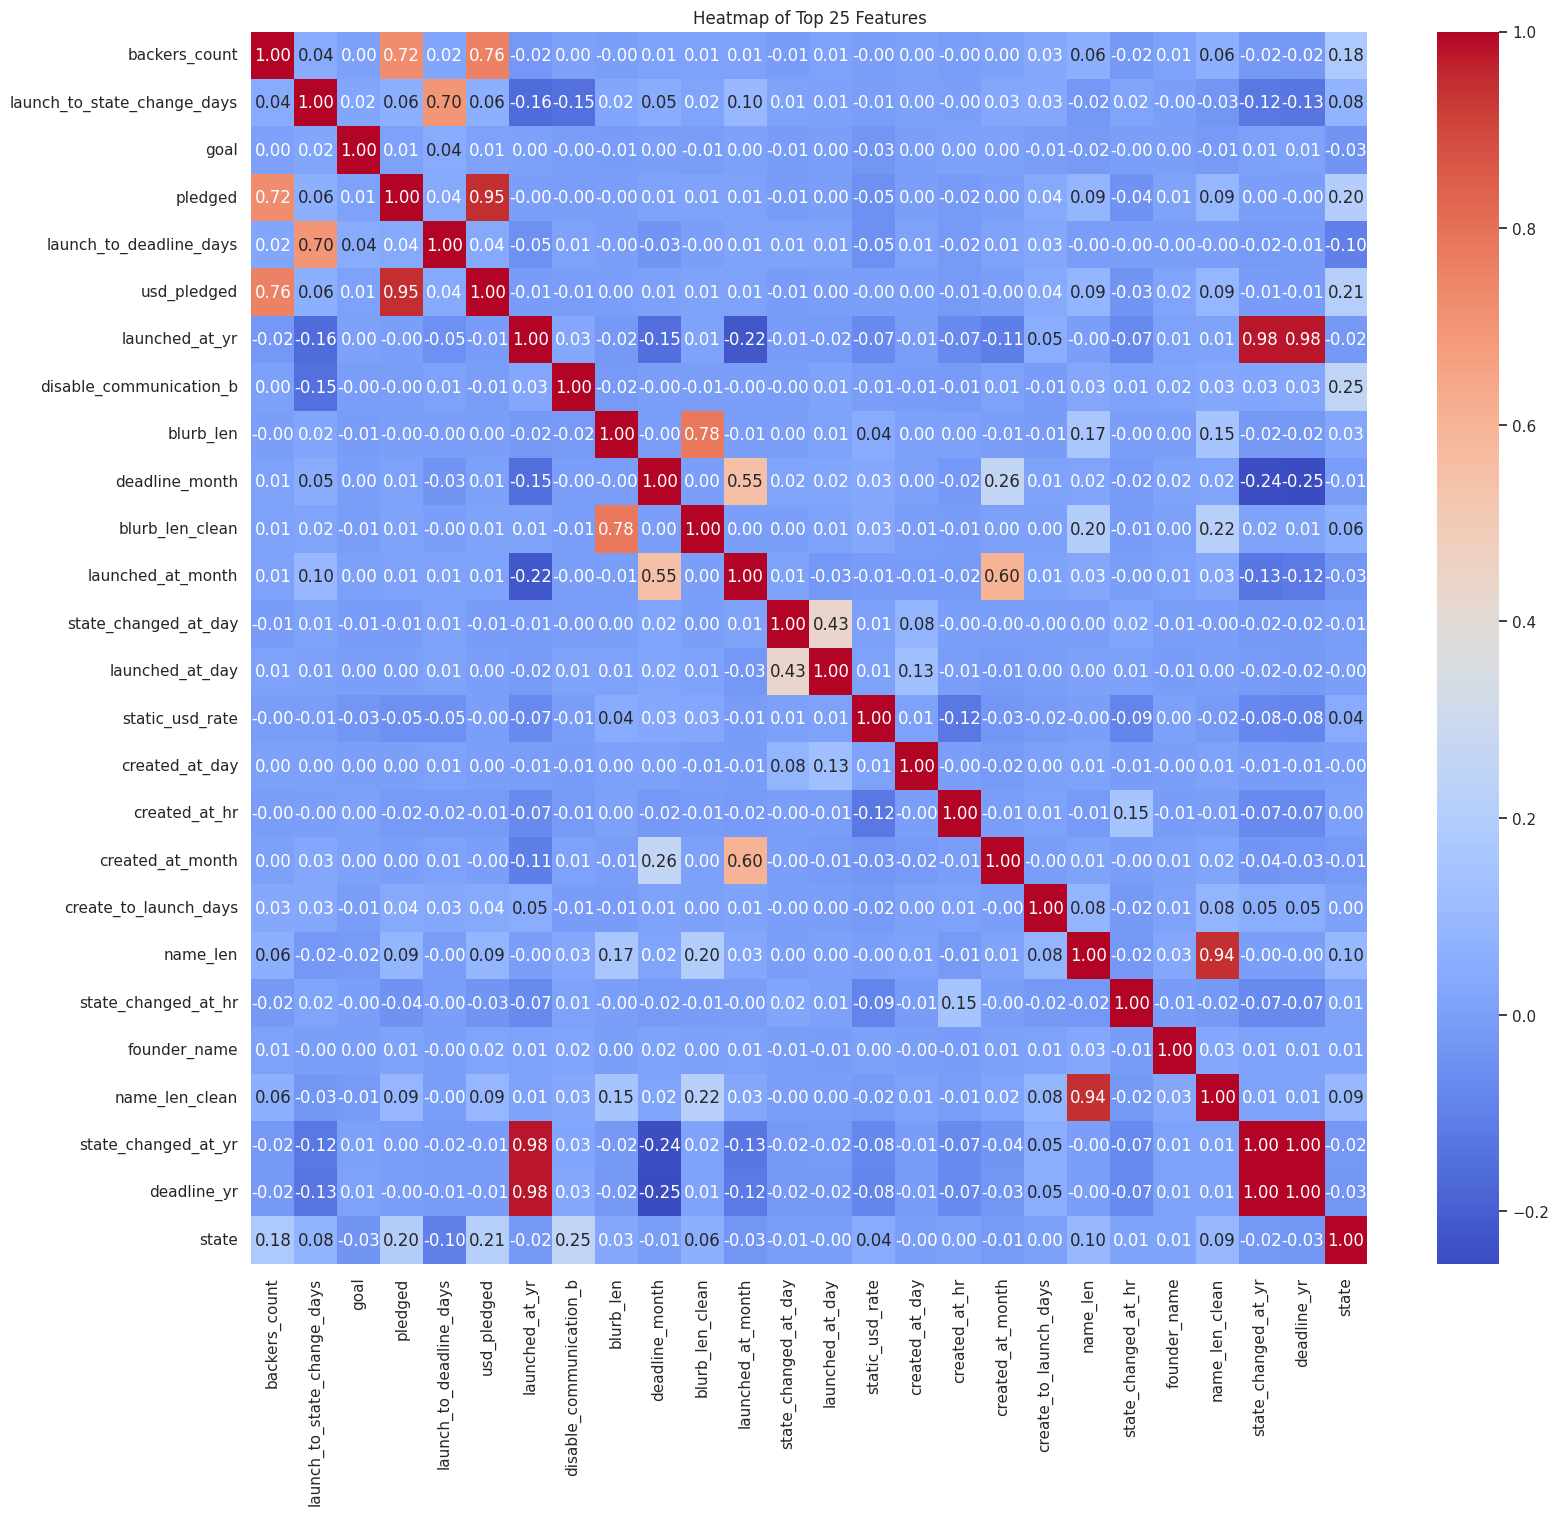

In [ ]:
corr_matrix = X_y_25.corr()

# Plot the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap of Top 25 Features')
plt.show()


In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_25, y, test_size = 0.2, shuffle=True, stratify=y, random_state=1)

In [ ]:
X_25_scaled = StandardScaler().fit_transform(X_25)

X_train_s, X_test_s,y_train_s, y_test_s = train_test_split(X_25_scaled, y, test_size = 0.2, shuffle=True, stratify=y, random_state=1)

In [ ]:
y_train.value_counts()

1    9133
3    4814
0    1964
2     406
4     184
Name: state, dtype: int64

In [ ]:
y_test.value_counts()

1    2283
3    1204
0     491
2     102
4      46
Name: state, dtype: int64

Base Model

In [ ]:
model_dict = {}

model_dict['Logistic Regression'] = LogisticRegression()
model_dict['Decision Tree'] = DecisionTreeClassifier(random_state = 1)
model_dict['SVM'] = SVC(random_state = 1)
# model_dict['Extra Trees'] = ExtraTreesClassifier(random_state = 1)
model_dict['Random Forest'] = RandomForestClassifier(random_state = 1)
model_dict['AdaBoost'] = AdaBoostClassifier(random_state = 1)
model_dict['Bagging'] = BaggingClassifier(random_state = 1)
model_dict['XGBoost'] = XGBClassifier(random_state = 1)
# model_dict['LGBM'] = LGBMClassifier(random_state = 1)
# model_dict['Cat'] = CatBoostClassifier(verbose=False, random_state =1)

In [ ]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    print('======================================{}======================================='.format(model_name))
    print('Accuracy Score is : {}'.format(accuracy))
    print()
    print('F1 Score is : {}'.format(f1))

In [ ]:
for model_name,model in model_dict.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

======================================Logistic Regression=======================================
Accuracy Score is : 0.788899660688318

F1 Score is : 0.34636214935621945
======================================Decision Tree=======================================
Accuracy Score is : 0.956858943286476

F1 Score is : 0.9349592937418171
======================================SVM=======================================
Accuracy Score is : 0.6454192922927775

F1 Score is : 0.2495997560776248
======================================Random Forest=======================================
Accuracy Score is : 0.9602520601066408

F1 Score is : 0.9588794396979562
======================================AdaBoost=======================================
Accuracy Score is : 0.7198254968492487

F1 Score is : 0.5346343651480557
======================================Bagging=======================================
Accuracy Score is : 0.9726126999515269

F1 Score is : 0.9558337136972469
[10:41:29] WARNING: ../src/learn

Stratified Cross Val Score

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=1)

for model_name,model in model_dict.items():
  print(model_name," Stratified Cross Val Accuracy",sum(cross_val_score(model,X_train,y_train,cv=skf,n_jobs=-1,scoring='accuracy'))/5)
print()
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print()
for model_name,model in model_dict.items():
  print(model_name," Stratified Cross Val F1",sum(cross_val_score(model,X_train,y_train,cv=skf,n_jobs=-1,scoring='f1_macro')/5))

Logistic Regression  Stratified Cross Val Accuracy 0.7717727961223871
Decision Tree  Stratified Cross Val Accuracy 0.951639723499766
SVM  Stratified Cross Val Accuracy 0.6462038500729805
Random Forest  Stratified Cross Val Accuracy 0.9589719919583597
AdaBoost  Stratified Cross Val Accuracy 0.7189865880862548
Bagging  Stratified Cross Val Accuracy 0.9692745999834761
XGBoost  Stratified Cross Val Accuracy 0.9854553532905548

-----------------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression  Stratified Cross Val F1 0.3392306369483492
Decision Tree  Stratified Cross Val F1 0.9298898057590331
SVM  Stratified Cross Val F1 0.2513705923854753
Random Forest  Stratified Cross Val F1 0.9550565100892918
AdaBoost  Stratified Cross Val F1 0.5322804854057497
Bagging  Stratified Cross Val F1 0.9548507266058037
XGBoost  Stratified Cross Val F1 0.984385899910049


Ensemble of all the 5 classifiers

In [ ]:
estimators = []
for key,val in model_dict.items():
  estimators.append((key,val))
# estimators

In [ ]:
estimators

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree', DecisionTreeClassifier(random_state=1)),
 ('SVM', SVC(random_state=1)),
 ('Random Forest', RandomForestClassifier(random_state=1)),
 ('AdaBoost', AdaBoostClassifier(random_state=1)),
 ('Bagging', BaggingClassifier(random_state=1)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=1, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))]

In [ ]:
estimators.pop(0)
estimators.pop(0)
estimators.pop(0)
estimators.pop(1)
# estimators.pop(2)

('AdaBoost', AdaBoostClassifier(random_state=1))

In [ ]:
# stacking_clf = StackingClassifier(estimators=estimators, final_estimator=CatBoostClassifier(verbose=False, random_state =1))
# stacking_clf.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = stacking_clf.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = stacking_clf.score(X_test, y_test)
# print("Accuracy:", accuracy)
# f1 = f1_score(y_test, y_pred,average="weighted")
# print("F1:", f1)

In [ ]:
# print(classification_report(y_test, y_pred))

voterclassifier

In [ ]:
# estimators = []
# for key,val in model_dict.items():
#   estimators.append((key,val))
# estimators.pop(0)
# estimators.pop(0)
# estimators.pop(1)
# # estimators.pop(2)

In [ ]:
# from sklearn.base import BaseEstimator, ClassifierMixin

# class ReshapePredictions(BaseEstimator, ClassifierMixin):
#     def __init__(self, estimator):
#         self.estimator = estimator

#     def fit(self, X, y):
#         self.estimator.fit(X, y)
#         return self

#     def predict(self, X):
#         y_pred = self.estimator.predict(X)
#         return y_pred.ravel()

# estimators[2] = ('estimator_name', ReshapePredictions(estimators[2][1]))

In [ ]:
voter = VotingClassifier(estimators=estimators)
voter.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voter.predict(X_test)

# Evaluate the accuracy of the model
accuracy = voter.score(X_test, y_test)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred,average="weighted")
print("F1:", f1)

[15:02:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9793989335918565
F1: 0.9789693469563725


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       491
           1       0.98      0.99      0.98      2283
           2       0.99      1.00      1.00       102
           3       0.98      1.00      0.99      1204
           4       1.00      0.98      0.99        46

    accuracy                           0.98      4126
   macro avg       0.99      0.97      0.98      4126
weighted avg       0.98      0.98      0.98      4126



In [ ]:
logit = LogisticRegression(random_state=1)
logit.fit(X_train_s,y_train)
y_pred = logit.predict(X_test_s)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred,average='macro'))

Accuracy:  0.8407658749394086
F1 Score:  0.894136397791274


In [ ]:
svc = SVC(random_state=1)
svc.fit(X_train_s,y_train)
y_pred = svc.predict(X_test_s)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred,average='macro'))

Accuracy:  0.7840523509452254
F1 Score:  0.8392483462930211


Hyperparameter tuning of each classification model and then doing the whole process again

In [ ]:
param_grid = {'max_depth': [5,13,15,17,19,None], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 5, 10], 'max_features': [None, 'sqrt', 'log2']}

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=skf,verbose=True)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print('Accuracy Score is : {}'.format(accuracy))
print()
print('F1 Score is : {}'.format(f1))

In [ ]:
dttuned = DecisionTreeClassifier(min_samples_leaf = 2 ,min_samples_split = 7,max_features = None,random_state=1,class_weight="balanced",ccp_alpha=0.00015,criterion="gini")
dttuned.fit(X_train, y_train)
y_pred_test = dttuned.predict(X_test)
y_pred_train = dttuned.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

###Logistic Regression

In [ ]:
#without scaling

logreg = LogisticRegression(random_state=1,max_iter=78,multi_class='multinomial',penalty='l2')
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

In [ ]:
#with scaling

logreg = LogisticRegression(random_state=1,max_iter=78,multi_class='multinomial',penalty='l2')
logreg.fit(X_train_s, y_train_s)
y_pred_test = logreg.predict(X_test_s)
y_pred_train = logreg.predict(X_train_s)
accuracy_test = accuracy_score(y_test_s,y_pred_test)
accuracy_train = accuracy_score(y_train_s,y_pred_train)
f1 = f1_score(y_test_s,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

Test Accuracy Score is : 0.8378574890935531
Train Accuracy Score is : 0.8360099387915884

F1 Score is : 0.8935307498198671


#SVM

In [ ]:
#without scaling

svc = SVC(random_state=1,C=0.99)
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
y_pred_train = svc.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

Test Accuracy Score is : 0.644449830344159
Train Accuracy Score is : 0.6503848251621114

F1 Score is : 0.24875411616336743


In [ ]:
svc = SVC(random_state=1,C=0.99)
svc.fit(X_train_s, y_train_s)
y_pred_test = svc.predict(X_test_s)
y_pred_train = svc.predict(X_train_s)
accuracy_test = accuracy_score(y_test_s,y_pred_test)
accuracy_train = accuracy_score(y_train_s,y_pred_train)
f1 = f1_score(y_test_s,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

Test Accuracy Score is : 0.78429471643238
Train Accuracy Score is : 0.7972850130295134

F1 Score is : 0.8393553694114221


In [ ]:
param_grid = {
    # 'n_estimators': [3000],
    # 'max_depth': [4],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': [None],
    # 'bootstrap': [True, False],
    'class_weight': ['balanced'],
    # 'criterion': ['gini', 'entropy']
    'ccp_alpha':[0.0001]
}

In [ ]:
crf = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator=crf, param_grid=param_grid, cv=skf,verbose=True)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print('Accuracy Score is : {}'.format(accuracy))
print()
print('F1 Score is : {}'.format(f1))

In [ ]:
rftuned = RandomForestClassifier(ccp_alpha = 0.0001,max_features = None, class_weight = 'balanced', random_state=1)
rftuned.fit(X_train, y_train)
y_pred = rftuned.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print('Accuracy Score is : {}'.format(accuracy))
print()
print('F1 Score is : {}'.format(f1))

Accuracy Score is : 0.9777023751817742

F1 Score is : 0.9795233100775971


In [ ]:
rftuned = RandomForestClassifier(ccp_alpha = 0.0001,criterion='entropy',max_features = None, class_weight = 'balanced', random_state=1)
rftuned.fit(X_train, y_train)
y_pred_test = rftuned.predict(X_test)
y_pred_train = rftuned.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

Test Accuracy Score is : 0.9781871061560834
Train Accuracy Score is : 0.9999393976122659

F1 Score is : 0.979284480799117


this is the tuned random forest hyperparemeters

Bagging Classifier Hyperparameter tuning

In [ ]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier()],
    'n_estimators': [34],
    # 'max_samples': [0.5, 0.7, 0.9],
    # 'max_features': [0.5, 0.7, 0.9],
    # 'bootstrap': [True, False],
    # 'bootstrap_features': [True, False],
    'n_jobs': [-1]
}


In [ ]:
crf = BaggingClassifier(random_state=1)
grid_search = GridSearchCV(estimator=crf, param_grid=param_grid, cv=skf,verbose=2)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print('Accuracy Score is : {}'.format(accuracy))
print()
print('F1 Score is : {}'.format(f1))

In [ ]:
bgctuned = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),n_estimators=33,n_jobs=-1,random_state=1)
bgctuned.fit(X_train, y_train)
y_pred_test = bgctuned.predict(X_test)
y_pred_train = bgctuned.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

Test Accuracy Score is : 0.9760058167716917
Train Accuracy Score is : 0.9998181928367977

F1 Score is : 0.978489723761314


In [ ]:
bgctuned = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),learning_rate=0.000001,random_state=1)
bgctuned.fit(X_train, y_train)
y_pred_test = bgctuned.predict(X_test)
y_pred_train = bgctuned.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

Test Accuracy Score is : 0.9602520601066408
Train Accuracy Score is : 1.0

F1 Score is : 0.964303940511169


fine tuned bagging model

Fine tuning XGBoost now

In [ ]:
model_dict['XGBoost'].get_params()

In [ ]:
param_grid = {
    'scale_pos_weight':[1],
    'n_estimators':[350],
    'n_jobs':[-1],
    'max_delta_step':[1],
    'gamma': [0.025]
}

In [ ]:
# Best hyperparameters: {'gamma': 0, 'max_delta_step': 1, 'n_estimators': 150, 'n_jobs': -1, 'scale_pos_weight': 1}

In [ ]:
crf = XGBClassifier(random_state = 1)
grid_search = GridSearchCV(estimator=crf, param_grid=param_grid, cv=skf,verbose=2)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
print('Accuracy Score is : {}'.format(accuracy))
print()
print('F1 Score is : {}'.format(f1))

In [ ]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=100, n_jobs=12, num_parallel_tree=1,
#               objective='multi:softprob', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=None, subsample=1,
#               tree_method='exact', use_label_encoder=False,
#               validate_parameters=1, verbosity=None)

In [ ]:
xgbtuned = XGBClassifier(random_state=1,n_estimators=160,objective='multi:softprob',max_depth=4,learning_rate=0.20,n_jobs=-1)
xgbtuned.fit(X_train, y_train)
y_pred_test = xgbtuned.predict(X_test)
y_pred_train = xgbtuned.predict(X_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
f1 = f1_score(y_test,y_pred_test,average='macro')
print('Test Accuracy Score is : {}'.format(accuracy_test))
print('Train Accuracy Score is : {}'.format(accuracy_train))
print()
print('F1 Score is : {}'.format(f1))

[13:09:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy Score is : 0.9873969946679593
Train Accuracy Score is : 0.9987273498575844

F1 Score is : 0.9874616054448246


In [ ]:
# (random_state=1,n_estimators=160,objective='multi:softprob',max_depth=4,learning_rate=0.20)

# Test Accuracy Score is : 0.9873969946679593
# Train Accuracy Score is : 0.9987273498575844

# F1 Score is : 0.9874616054448246

In [ ]:
# Best hyperparameters: {'gamma': 0.01, 'max_delta_step': 1, 'n_estimators': 170, 'n_jobs': -1, 'scale_pos_weight': 1}
# Accuracy Score is : 0.9932137663596704

# F1 Score is : 0.9919786671240878

# Best hyperparameters: {'gamma': 0.025, 'max_delta_step': 1, 'n_estimators': 350, 'n_jobs': -1, 'scale_pos_weight': 1}
# Accuracy Score is : 0.9932137663596704

# F1 Score is : 0.9919786671240878

# Best hyperparameters: {'gamma': 0.02, 'max_delta_step': 1, 'n_estimators': 250, 'n_jobs': -1, 'scale_pos_weight': 1}
# Accuracy Score is : 0.993456131846825

# F1 Score is : 0.9922375358009378

In [ ]:
# model_dict['Cat'].get_all_params()

In [ ]:
# param_grid = {
#     'auto_class_weights': ['Balanced'],
#     'l2_leaf_reg': [7],
#     'eval_metric': ['TotalF1'],
#     'iterations' :[3000],
#     'verbose' :[False]

# }

In [ ]:
# crf = CatBoostClassifier(random_state = 1)
# grid_search = GridSearchCV(estimator=crf, param_grid=param_grid, cv=skf,verbose=2)
# # grid_search.fit(X_train, y_train)

# print("Best hyperparameters:", grid_search.best_params_)
# y_pred = grid_search.predict(X_test)

# accuracy = accuracy_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred,average='macro')
# print('Accuracy Score is : {}'.format(accuracy))
# print()
# print('F1 Score is : {}'.format(f1))

Best hyperparameters: {'auto_class_weights': 'Balanced', 'eval_metric': 'TotalF1', 'iterations': 1500, 'l2_leaf_reg': 6, 'verbose': False}
Accuracy Score is : 0.9946679592825982

F1 Score is : 0.9926026992944618


Best hyperparameters: {'auto_class_weights': 'Balanced', 'eval_metric': 'TotalF1', 'iterations': 2000, 'l2_leaf_reg': 6, 'verbose': False}
Accuracy Score is : 0.9951526902569074

F1 Score is : 0.9940375965548187

In [ ]:
# RandomForestClassifier(ccp_alpha = 0.0001,max_features = None, class_weight = 'balanced', random_state=1)
# BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 34, n_jobs=-1, random_state=1)
# XGBClassifier(gamma = 0.02, max_delta_step = 1,n_estimators = 250, n_jobs=-1, scale_pos_weight=1 ) Accuracy Score is : 0.993456131846825 F1 Score is : 0.9922375358009378
# CatBoostClassifier(auto_class_weights='Balanced', eval_metric='TotalF1', iterations=2000, l2_leaf_reg=6, verbose=False, random_state =1)

FINE TUNED MODEL PERFORMANCE EVALUATION

In [ ]:
# model_dict_1 = {}

# model_dict_1['Logistic Regression'] = LogisticRegression()
# model_dict_1['Decision Tree'] = DecisionTreeClassifier(random_state = 1)
# # model_dict['Extra Trees'] = ExtraTreesClassifier(random_state = 1)
# model_dict_1['Random Forest'] = RandomForestClassifier(ccp_alpha = 0.0001,max_features = None, class_weight = 'balanced', random_state=1)
# # model_dict['AdaBoost'] = AdaBoostClassifier(random_state = 1)
# model_dict_1['Bagging'] = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 34, n_jobs=-1, random_state=1)
# model_dict_1['XGBoost'] = XGBClassifier(gamma = 0.02, max_delta_step = 1,n_estimators = 250, n_jobs=-1, scale_pos_weight=1)
# # model_dict['LGBM'] = LGBMClassifier(random_state = 1)
# model_dict_1['Cat'] = CatBoostClassifier(auto_class_weights='Balanced', eval_metric='TotalF1', iterations=2000, l2_leaf_reg=6, verbose=False, random_state =1)

In [ ]:
model_dict_1 = {}

model_dict_1['Logistic Regression'] = LogisticRegression(random_state=1,max_iter=78,multi_class='multinomial',penalty='l2')
model_dict_1['Decision Tree'] = DecisionTreeClassifier(min_samples_leaf = 2 ,min_samples_split = 7,max_features = None,random_state=1,class_weight="balanced",ccp_alpha=0.00015,criterion="gini")
model_dict_1['SVM'] = SVC(random_state=1,C=0.99,probability=True)
# model_dict['Extra Trees'] = ExtraTreesClassifier(random_state = 1)
model_dict_1['Random Forest'] = RandomForestClassifier(ccp_alpha = 0.0001,criterion='entropy',max_features = None, class_weight = 'balanced', random_state=1)
model_dict_1['AdaBoost'] = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),learning_rate=0.000001,random_state=1)
model_dict_1['Bagging'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1,class_weight="balanced"),n_estimators=33,n_jobs=-1,random_state=1)
model_dict_1['XGBoost'] = XGBClassifier(random_state=1,n_estimators=160,objective='multi:softprob',max_depth=4,learning_rate=0.20,n_jobs=-1)

In [ ]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    print('======================================{}======================================='.format(model_name))
    print('Accuracy Score is : {}'.format(accuracy))
    print()
    print('F1 Score is : {}'.format(f1))

In [ ]:
for model_name,model in model_dict_1.items():
    model_test(X_train, X_test, y_train, y_test, model, model_name)

======================================Logistic Regression=======================================
Accuracy Score is : 0.8005332040717402

F1 Score is : 0.3560545520492499
======================================Decision Tree=======================================
Accuracy Score is : 0.9590402326708677

F1 Score is : 0.9625363504512727
======================================SVM=======================================
Accuracy Score is : 0.644449830344159

F1 Score is : 0.24875411616336743
======================================Random Forest=======================================
Accuracy Score is : 0.9781871061560834

F1 Score is : 0.979284480799117
======================================AdaBoost=======================================
Accuracy Score is : 0.9602520601066408

F1 Score is : 0.964303940511169
======================================Bagging=======================================
Accuracy Score is : 0.9760058167716917

F1 Score is : 0.978489723761314
[13:38:31] WARNING: ../src/learner

In [ ]:
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=1)

for model_name,model in model_dict_1.items():
  print(model_name," Stratified Cross Val Accuracy",sum(cross_val_score(model,X_train,y_train,cv=skf,n_jobs=-1,scoring='accuracy'))/5)
print()
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print()
for model_name,model in model_dict_1.items():
  print(model_name," Stratified Cross Val F1",sum(cross_val_score(model,X_train,y_train,cv=skf,n_jobs=-1,scoring='f1_macro')/5))

Logistic Regression  Stratified Cross Val Accuracy 0.7945587287598799
Decision Tree  Stratified Cross Val Accuracy 0.9516999440022765
SVM  Stratified Cross Val Accuracy 0.6457796260086475
Random Forest  Stratified Cross Val Accuracy 0.9752133880458629
AdaBoost  Stratified Cross Val Accuracy 0.9505484288507615
Bagging  Stratified Cross Val Accuracy 0.9715772447284111
XGBoost  Stratified Cross Val Accuracy 0.9850917720066462

-----------------------------------------------------------------------------------------------------------------------------------------------

Logistic Regression  Stratified Cross Val F1 0.3506750314380052
Decision Tree  Stratified Cross Val F1 0.9559261729757529
SVM  Stratified Cross Val F1 0.25099940131556375
Random Forest  Stratified Cross Val F1 0.9759041230178913
AdaBoost  Stratified Cross Val F1 0.9546995746328948
Bagging  Stratified Cross Val F1 0.9730956324925933
XGBoost  Stratified Cross Val F1 0.9845551304435213


In [ ]:
tuned_estimators = []
for key,val in model_dict_1.items():
  tuned_estimators.append((key,val))
tuned_estimators

[('Logistic Regression',
  LogisticRegression(max_iter=78, multi_class='multinomial', random_state=1)),
 ('Decision Tree',
  DecisionTreeClassifier(ccp_alpha=0.00015, class_weight='balanced',
                         min_samples_leaf=2, min_samples_split=7, random_state=1)),
 ('SVM', SVC(C=0.99, probability=True, random_state=1)),
 ('Random Forest',
  RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                         criterion='entropy', max_features=None, random_state=1)),
 ('AdaBoost',
  AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                      random_state=1),
                     learning_rate=1e-06, random_state=1)),
 ('Bagging',
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                          random_state=1),
                    n_estimators=33, n_jobs=-1, random_state=1)),
 ('XGBoost',
  XGBClassifier(base_sc

In [ ]:
tuned_estimators.pop(0)
tuned_estimators.pop(0)
tuned_estimators.pop(0)
tuned_estimators.pop(1)

('AdaBoost',
 AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=1),
                    learning_rate=1e-06, random_state=1))

In [ ]:
tuned_estimators

[('Random Forest',
  RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                         criterion='entropy', max_features=None, random_state=1)),
 ('Bagging',
  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                          random_state=1),
                    n_estimators=33, n_jobs=-1, random_state=1)),
 ('XGBoost',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.2, max_delta_step=0, max_depth=4,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=160, n_jobs=-1, num_parallel_tree=1,
                objective='multi:softprob', random_state=1, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=None, subsample=1,
                tr

In [ ]:
for i, est in enumerate(tuned_estimators):
    y_pred = est[1].predict(X_test)
    print(f"Estimator {i}: {est[0]}, output shape: {y_pred.shape}")


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class ReshapePredictions(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y):
        self.estimator.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.estimator.predict(X)
        return y_pred.ravel()

tuned_estimators[2] = ('estimator_name', ReshapePredictions(tuned_estimators[2][1]))

In [ ]:
# tuned_estimators.pop()
# tuned_estimators
voter = VotingClassifier(estimators=tuned_estimators,voting ='soft')
voter.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = voter.predict(X_test)

# Evaluate the accuracy of the model
accuracy = voter.score(X_test, y_test)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred_tuned,average="weighted")
print("F1:", f1)

[13:42:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9835191468734852
F1: 0.983278399675893


In [ ]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       491
           1       0.98      0.99      0.99      2283
           2       0.99      1.00      1.00       102
           3       0.98      1.00      0.99      1204
           4       1.00      1.00      1.00        46

    accuracy                           0.98      4126
   macro avg       0.99      0.98      0.98      4126
weighted avg       0.98      0.98      0.98      4126



##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

voter.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_tuned = voter.predict(X_test)

# Evaluate the accuracy of the model
accuracy = voter.score(X_test, y_test)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred_tuned,average="weighted")
print("F1:", f1)

[13:47:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9832767813863306
F1: 0.9830849559577659


In [ ]:
for model_name,model in model_dict_1.items():
    model_test(X_train_resampled, X_test, y_train_resampled, y_test, model, model_name)

======================================Logistic Regression=======================================
Accuracy Score is : 0.6366941347552109

F1 Score is : 0.3243829194595377
======================================Decision Tree=======================================
Accuracy Score is : 0.9602520601066408

F1 Score is : 0.965363715821917
======================================SVM=======================================
Accuracy Score is : 0.6257876878332526

F1 Score is : 0.311772824645417
======================================Random Forest=======================================
Accuracy Score is : 0.9796412990790111

F1 Score is : 0.9803947938003692
======================================AdaBoost=======================================
Accuracy Score is : 0.9515269025690741

F1 Score is : 0.9566039766674038
======================================Bagging=======================================
Accuracy Score is : 0.9760058167716917

F1 Score is : 0.978823475865773
[14:13:30] WARNING: ../src/learner

In [ ]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       491
           1       0.98      0.99      0.99      2283
           2       0.98      1.00      0.99       102
           3       0.98      1.00      0.99      1204
           4       1.00      1.00      1.00        46

    accuracy                           0.98      4126
   macro avg       0.99      0.98      0.98      4126
weighted avg       0.98      0.98      0.98      4126

